In [4]:
# the imports:

# pandas for handling the data
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a Python data visualization library that offers a user-friendly interface 
#    for generating visually appealing and informative statistical graphics.
import seaborn as sns

# From sklearn we import some classes and functions for data handling, the tree classifier, 
#    the accuracy and the plot function to depict the tree  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 

# This class we use it to search exhaustive over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV 

In [5]:
df_iris = pd.read_csv("D:\\Documents\\sem4\\AI\\iris_teach_2.csv")
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  iris_name  
0    setosa  
1    setosa  
2    setosa  
3    setosa  
4    setosa  


In [6]:
empty_cells = df_iris.isnull().sum()

# Print the number of empty cells for each column
print(empty_cells)

sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1
dtype: int64


In [7]:
# Remove rows with empty cells from the DataFrame
df_iris.dropna(inplace=True)

# Print the first few rows of the cleaned DataFrame to check if the empty cells were removed
print(df_iris.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  iris_name  
0    setosa  
1    setosa  
2    setosa  
3    setosa  
4    setosa  


In [8]:
# your code here

X = df_iris.drop('iris_name', axis=1)

# Define y as the Series containing the target variable
y = df_iris['iris_name']

# Print the shapes of X and y to check if they were created correctly
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (150, 4)
y shape: (150,)


In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object to y and encode y with it
y_encoded = le.fit_transform(y)

# Print the encoded target variable y_encoded
print(y_encoded)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=42)

# Print the shapes of the training and testing sets to check if they were created correctly
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (100, 4)
X_test shape: (50, 4)
y_train shape: (100,)
y_test shape: (50,)


In [12]:
# Create a decision tree classifier object 
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
# Fit the classifier to the training data 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [13]:
# Make predictions on the test set 
y_pred = tree_clf.predict(X_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.98


[Text(0.4444444444444444, 0.9285714285714286, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'X[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'X[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'X[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'X[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.0714285714

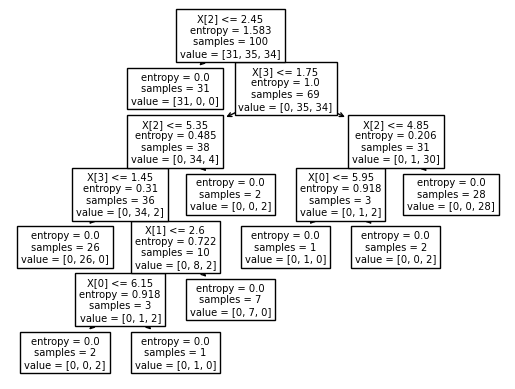

In [14]:
# Visualize the decision tree 
plot_tree(tree_clf)

In [15]:
# Define the hyperparameters to search over 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(X_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 3}


In [16]:
# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

[Text(0.375, 0.875, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.25, 0.375, 'X[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.125, 0.125, 'entropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\nentropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

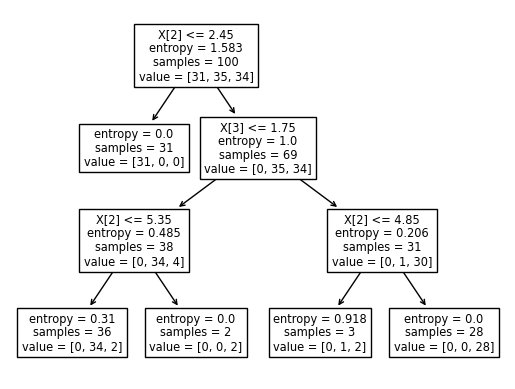

In [17]:
plot_tree(tree_clf_tuned)

In [20]:
df_clean_iris_set = X.copy()
df_clean_iris_set['iris_name']=y_encoded
df_clean_iris_set.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

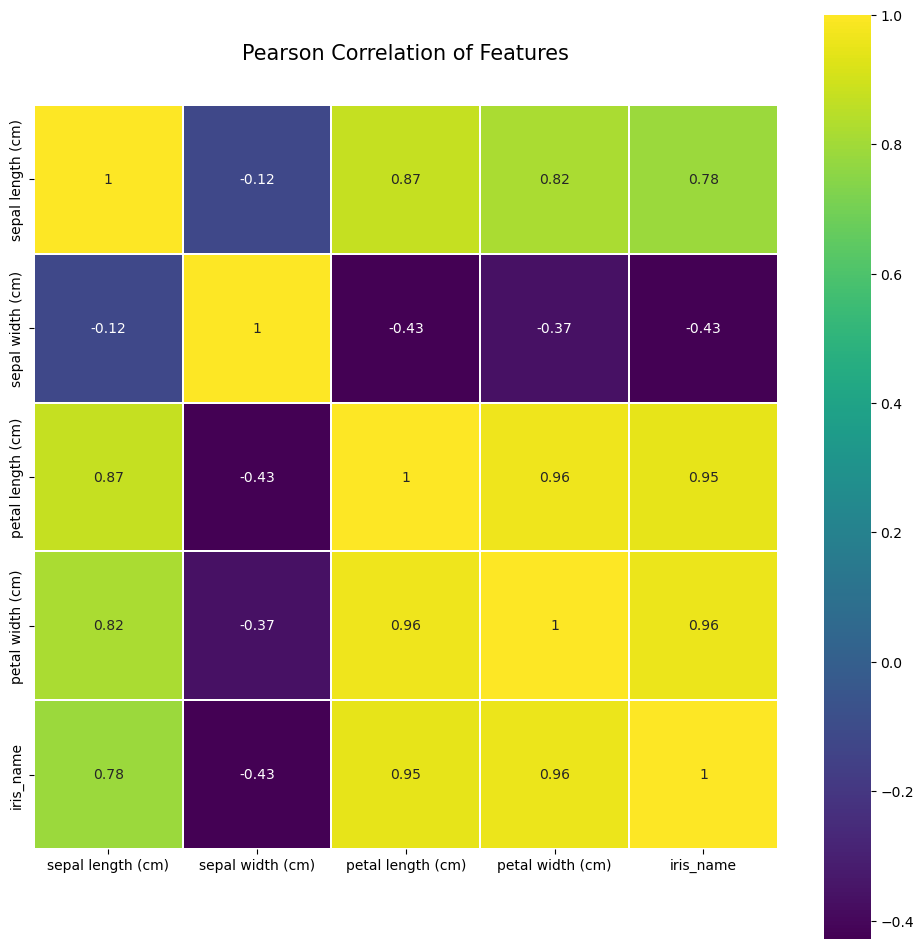

In [21]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_clean_iris_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  iris_name  
0    setosa  
1    setosa  
2    setosa  
3    setosa  
4    setosa  
Accuracy: 0.92
Best hyperparameters: {'max_depth': 4}


[Text(0.4444444444444444, 0.9, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 4.95\nentropy = 0.206\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(0.2222222222222222, 0.3, 'X[2] <= 3.9\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.7777777777777778, 0.5, 'X[2] <= 5.15\nentropy = 0.562\nsamples = 38\nvalue = [0, 5, 33]'),
 Text(0.6666666666666666, 0.3, 'X[0] <= 6.5\nentropy = 0.94\nsamples = 14\nvalue = [0, 5, 9]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.811\nsamples = 12\nvalue = [0, 3, 9]'),


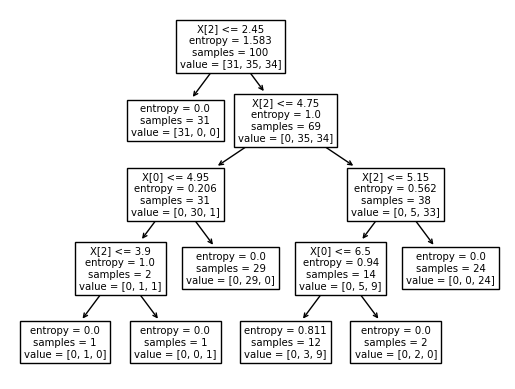

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 
from sklearn.model_selection import GridSearchCV 

df_iris = pd.read_csv("D:\\Documents\\sem4\\AI\\iris_teach_2.csv")
print(df_iris.head())
empty_cells = df_iris.isnull().sum()
df_iris.dropna(inplace=True)
X = df_iris.drop('iris_name', axis=1)
X = X.drop('petal width (cm)', axis=1)
y = df_iris['iris_name']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=42)
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))
plot_tree(tree_clf)
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
grid_search.fit(X_train, y_train) 
print("Best hyperparameters:", grid_search.best_params_)
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42) 
tree_clf_tuned.fit(X_train, y_train)
plot_tree(tree_clf_tuned)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  iris_name  
0    setosa  
1    setosa  
2    setosa  
3    setosa  
4    setosa  
Accuracy: 0.92
Best hyperparameters: {'max_depth': 4}


[Text(0.4444444444444444, 0.9, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 4.95\nentropy = 0.206\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(0.2222222222222222, 0.3, 'X[2] <= 3.9\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.7777777777777778, 0.5, 'X[2] <= 5.15\nentropy = 0.562\nsamples = 38\nvalue = [0, 5, 33]'),
 Text(0.6666666666666666, 0.3, 'X[0] <= 6.5\nentropy = 0.94\nsamples = 14\nvalue = [0, 5, 9]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.811\nsamples = 12\nvalue = [0, 3, 9]'),


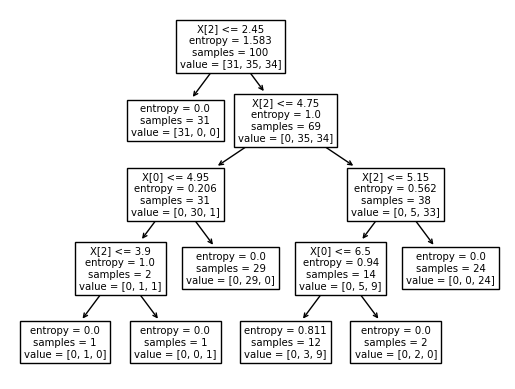

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 
from sklearn.model_selection import GridSearchCV 

df_iris = pd.read_csv("D:\\Documents\\sem4\\AI\\iris_teach_2.csv")
print(df_iris.head())
empty_cells = df_iris.isnull().sum()
df_iris.dropna(inplace=True)
X = df_iris.drop('iris_name', axis=1)
X = X.drop('petal width (cm)', axis=1)
y = df_iris['iris_name']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=42)
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))
plot_tree(tree_clf)
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
grid_search.fit(X_train, y_train) 
print("Best hyperparameters:", grid_search.best_params_)

tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=grid_search.best_params_['max_depth'], random_state=42) 
tree_clf_tuned.fit(X_train, y_train)
plot_tree(tree_clf_tuned)